<a href="https://colab.research.google.com/github/aniusoro/Uni/blob/main/Homework10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData



In [2]:
install.packages("plyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Question 1:


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Condition,n,mean,s,se,df,alpha,t_crit,MOE,CI_bottom,CI_upper
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AS,15,9.933333,6.518837,1.6831565,14,0.05,2.144787,3.6100117,6.323322,13.54335
DS,15,9.600000,4.404543,1.1372481,14,0.05,2.144787,2.4391547,7.160845,12.03915
NS,15,9.400000,1.404076,0.3625308,14,0.05,2.144787,0.7775512,8.622449,10.17755


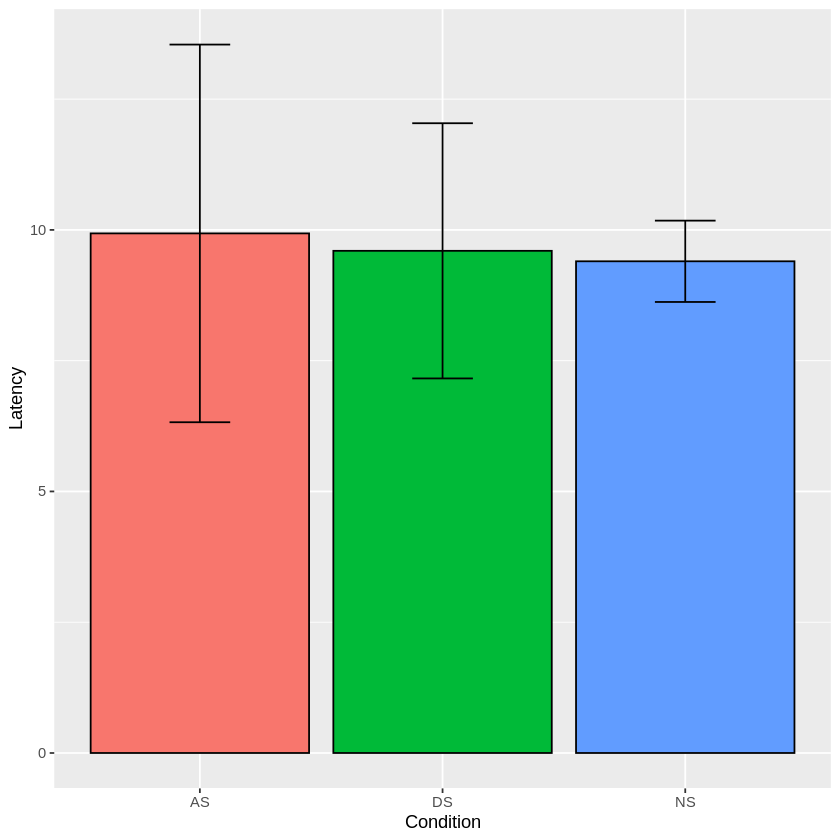

In [4]:
smokers = read.csv("smokers.csv")
library(ggplot2)
library(plyr)
library(dplyr)
plotdata = ddply(smokers, c("Condition"), summarise,
                n = length(Latency),
                mean = mean(Latency),
                s = sd(Latency),
                se = s/sqrt(n),
                df = n - 1,
                alpha = 0.05,
                t_crit = qt(alpha/2, df = df, lower.tail = FALSE),
                MOE = t_crit * se,
                CI_bottom = mean - MOE,
                CI_upper = mean + MOE
)
plotdata
ggplot(plotdata, aes(x = Condition, y = mean)) +
  geom_bar(stat = "identity", colour = "black",aes(fill = Condition )) + 
  geom_errorbar(aes(ymin = CI_bottom,
                  ymax = CI_upper),
                  width = .25) + 
  xlab("Condition") + 
  ylab("Latency") + 
  theme(legend.position="none")

Question 2:

The problem with the data is that there is too much variation in intervals between the three Conditions.

Question 3:

In [5]:
latency = smokers$Latency
# Grand Mean
gm = mean(latency)

# sum of squares total (sst)
sst = sum((latency - gm)^2)

# model sum of squares (ssm)
ssm = sum(plotdata$n * (plotdata$mean - gm)^2)

# residual sum of squares (ssr)
ssr = sst - ssm

# degree of freedom (total)
dftotal = 45 - 1
dftotal

# degree of freedom (model)
dfmodel = 3 - 1
dfmodel

# model sum of squares (msm)
msm = ssm / dfmodel

# degrees of freedom (residuals)
dfres = dftotal - dfmodel

# residual mean squares
msr = ssr / dfres

# multiple rsquared
msq = ssm / sst

# fstat
fstat = msm / msr
round(fstat, 6)

# pvalue
q3pval = pf(fstat, df1 = 2, df2 = 42, lower.tail = FALSE)
round(q3pval, 6)

[1] 44

[1] 2

[1] 0.051148

[1] 0.950197

Question 4:

In [6]:
a = ssm - dfmodel * msr
b = (ssm + ssr ) + msr
w_sq = a/b
round(w_sq, 3)
# *******WHAT DOES IT MEAN**********

[1] -0.044

this may mean that the data does not account for any variance


Question 5:



In [7]:
# factor our predictor
smokers$Condition = factor(smokers$Condition)

cont1 = c(1, 1, -2)
cont2 = c(1, -1, 0)

contrasts(smokers$Condition) = cbind(cont1, cont2)

q5model = lm(Latency ~ Condition, data = smokers)

summary(q5model)
 # ******** MIGHT NEED TO STATE THEM OUT INDIVIDUALLY ********


Call:
lm(formula = Latency ~ Condition, data = smokers)

Residuals:
   Min     1Q Median     3Q    Max 
-8.933 -2.400 -0.600  1.600 12.067 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.6444     0.6878  14.022   <2e-16 ***
Conditioncont1   0.1222     0.4864   0.251    0.803    
Conditioncont2   0.1667     0.8424   0.198    0.844    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.614 on 42 degrees of freedom
Multiple R-squared:  0.00243,	Adjusted R-squared:  -0.04507 
F-statistic: 0.05115 on 2 and 42 DF,  p-value: 0.9502


Question 6:

In [8]:
Rcont1 = ((0.251)^2) / ((0.251)^ 2 + 42)
round(Rcont1, 3)

Rcont2 = ((0.198)^2) / ((0.198)^ 2 + 42)
round(Rcont2, 3)


[1] 0.001

[1] 0.001

Question 7:

In [9]:
# levene test
leveneTest(Latency ~ Condition, data = smokers)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,5.62049,0.006871763
,42,NA,NA


The p-value of the test is 0.006871763, which is less than our significance level of 0.05.

Thus, we conclude that the variance among the three groups is not equal.

Question 8:

In [10]:
# perform Welch's ANOVA
oneway.test(Latency ~ Condition, data = smokers, var.equal = FALSE)


	One-way analysis of means (not assuming equal variances)

data:  Latency and Condition
F = 0.057131, num df = 2.000, denom df = 21.113, p-value = 0.9446


The overall p-value here is 0.9446 which is less than 0.05, this means that we fail to reject that the Latency scores are equal between the three groups. So yes, the interpretation of this ANOVA changes from the first one I ran.

Question 9:

In [36]:
install.packages("pwr")
library(pwr)
pwr.anova.test(k = 3, f=0.05, sig.level = 0.05, power = 0.85)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




     Balanced one-way analysis of variance power calculation 

              k = 3
              n = 1457.426
              f = 0.05
      sig.level = 0.05
          power = 0.85

NOTE: n is number in each group


Question 10:

In [12]:
memory = read.csv("memory.csv")
memory = memory[order(memory$Strategy,memory$Subject), ]


The data is balanced because there is equal number of sample size for each of the experimental groups. 

Question 11:

I expect the generated group to have a higher mean recall vallu when compared to the others, but also expected the provided to be the lowest

Question 12:

In [13]:
plotdata2 = ddply(memory, c("Strategy", "Delay"), summarise,
                n = length(Recall),
                mean = mean(Recall),
                s = sd(Recall),
                se = s/sqrt(n),
                df = n - 1,
                alpha = 0.05,
                t_crit = qt(alpha/2, df = df, lower.tail = FALSE),
                MOE = t_crit * se,
                CI_bottom = mean - MOE,
                CI_upper = mean + MOE
)
plotdata2


Strategy,Delay,n,mean,s,se,df,alpha,t_crit,MOE,CI_bottom,CI_upper
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Generated,2d,13,4.00000,2.516611,0.6979824,12,0.05,2.178813,1.5207731,2.479227,5.520773
Generated,5m,13,14.92308,5.330127,1.4783113,12,0.05,2.178813,3.2209637,11.702113,18.144041
Provided,2d,13,2.00000,1.471960,0.4082483,12,0.05,2.178813,0.8894966,1.110503,2.889497
Provided,5m,13,20.53846,1.983910,0.5502375,12,0.05,2.178813,1.1988646,19.339597,21.737326
Rote,2d,13,12.76923,6.796492,1.8850078,12,0.05,2.178813,4.1070792,8.662152,16.876310
Rote,5m,13,15.38462,5.454944,1.5129292,12,0.05,2.178813,3.2963895,12.088226,18.681005


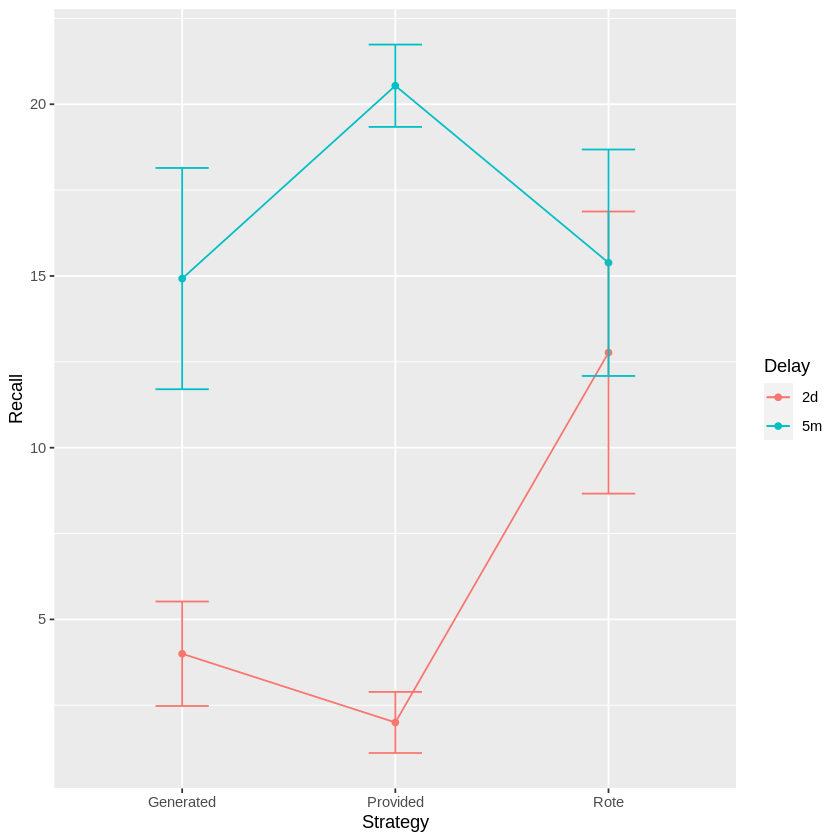

In [14]:
ggplot(plotdata2, aes(x = Strategy, y = mean)) +
  geom_line(aes(colour = Delay, group = Delay)) + 
  geom_point(aes(colour = Delay, group = Delay)) + 
  geom_errorbar(aes(ymin = CI_bottom,
                  ymax = CI_upper,
                  colour = Delay),
                  width = .25) + 
  xlab("Strategy") + 
  ylab("Recall")

I believe there is an interaction between stratergy and delay


Question 13:

In [26]:
recall = memory$Recall
# Grand Mean
gm2 = mean(recall)

# total sum of squares (sst)
sst2 = sum((recall - gm2)^2)
round(sst2, 3)

q13df = nrow(memory) - 1
q13df

[1] 4736.679

[1] 77

Question 14:

In [16]:
# model sum of squares (ssm)
ssm2 = sum(plotdata2$n * (plotdata2$mean - gm2)^2)
round(ssm2, 3)

# degree of freedom (model)
dfmodel2 = 6 - 1
dfmodel2

[1] 3335.141

[1] 5

Question 15:

In [17]:
# Main Effect of Strategy
q15plotdata = ddply(memory, c("Strategy"), summarise,
                    n = length(Recall),
                    mean = mean(Recall)
                    )

q15plotdata
ssa15 = sum(q15plotdata$n * (q15plotdata$mean - gm2)^2)
round(ssa15, 3)

q15df = 3 - 1
q15df

Strategy,n,mean
<chr>,<int>,<dbl>
Generated,26,9.461538
Provided,26,11.269231
Rote,26,14.076923


[1] 281.256

[1] 2

Question 16:

In [18]:
# Main Effect of Delay
q16plotdata = ddply(memory, c("Delay"), summarise,
                    n = length(Recall),
                    mean = mean(Recall)
                    )
q16plotdata
ssb16 = sum(q16plotdata$n * (q16plotdata$mean - gm2)^2)
round(ssb16, 3)
q16df = 2 - 1
q16df

Delay,n,mean
<chr>,<int>,<dbl>
2d,39,6.25641
5m,39,16.94872


[1] 2229.346

[1] 1

Question 17:

In [19]:
ssinterac = ssm2 - ssa15 - ssb16
round(ssinterac, 3)

dfinterac = q15df * q16df
dfinterac

[1] 824.538

[1] 2

Question 18:

In [20]:
ssR = sst2 - ssm2
round(ssR, 3) 

q18df = 77 - 2 - 1 - 2
q18df

[1] 1401.538

[1] 72

Question 19:

In [21]:
# mean square of stratergy
msstrat = ssa15 / q15df
round(msstrat, 3)

# mean square of delay
msdelay = ssb16 / q16df
round(msdelay, 3)

# mean square of interaction
msinterac = ssinterac / dfinterac
round(msinterac, 3)

# mean square of residuals
msresid = ssR / q18df
round(msresid, 3)



[1] 140.628

[1] 2229.346

[1] 412.269

[1] 19.466

Question 20:

In [22]:
Fstrat = msstrat / msresid
round(Fstrat, 3)

Fdelay = msdelay / msresid
round(Fdelay, 3)

Finterac = msinterac / msresid
round(Finterac, 3)

[1] 7.224

[1] 114.526

[1] 21.179

Question 21:

In [23]:
q21cheat = aov(Recall ~ Strategy * Delay, data = memory)
summary(q21cheat)

               Df Sum Sq Mean Sq F value   Pr(>F)    
Strategy        2  281.3   140.6   7.224  0.00138 ** 
Delay           1 2229.3  2229.3 114.526  < 2e-16 ***
Strategy:Delay  2  824.5   412.3  21.179 5.84e-08 ***
Residuals      72 1401.5    19.5                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Question 22:

It can be seen that the two main effects, the strategy and delay are statistically significant. As well as their interaction.

Question 23:

In [45]:
memory$All_levels = paste(memory$Strategy, memory$Delay, sep = "")
memory$All_levels = factor(memory$All_levels)
levels(memory$All_levels)

[1] "Generated2d" "Generated5m" "Provided2d"  "Provided5m"  "Rote2d"     
[6] "Rote5m"

In [63]:
contrast1 = c(1, 1, 1, 1, -2, -2)
contrast2 = c(1, -1, 1, -1, 0, 0)
contrast3 = c(1, -1, 0, 0, 0, 0)
contrast4 = c(0, 0, 1, -1, 0, 0)
contrast5 = c(0, 0, 0, 0, 1, -1)
grid = cbind(contrast1, contrast2, contrast3, contrast4, contrast5)
grid

contrast1,contrast2,contrast3,contrast4,contrast5
1,1,1,0,0
1,-1,-1,0,0
1,1,0,1,0
1,-1,0,-1,0
-2,0,0,0,1
-2,0,0,0,-1


In [65]:
summary(lm(Recall ~ All_levels, data = memory))


Call:
lm(formula = Recall ~ All_levels, data = memory)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.923  -2.000   0.000   2.192  13.231 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          11.6026     0.4996  23.225  < 2e-16 ***
All_levelscontrast1  -1.2372     0.3532  -3.502 0.000796 ***
All_levelscontrast2  -7.3654     0.6118 -12.038  < 2e-16 ***
All_levelscontrast3   1.0000     0.8653   1.156 0.251619    
All_levelscontrast4   2.8077     0.8653   3.245 0.001784 ** 
All_levelscontrast5  -1.3077     0.8653  -1.511 0.135084    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.412 on 72 degrees of freedom
Multiple R-squared:  0.7041,	Adjusted R-squared:  0.6836 
F-statistic: 34.27 on 5 and 72 DF,  p-value: < 2.2e-16


from the summary above, the significant contrasts are:


1.   Contrast1 ([Gen2d, Gen5m, Prov2d, Prov5m] vs [Rote2d, Rote5m])
2.   Contrast2 ([Gen2d, Gen5m] vs [Prov2d, Prov5m])
3.   Contrast4 ([Prov2d] vs [Prov5m])



Question 24:

I would say because the significant contrasts involved generated and provided, I believe that delay has the most effect on these two strategier and the least effect on the rote strategy. But the best overall will be provided group because the conrtrast that compared itself proved to be significant.

Question 25:

In [78]:
pairwise.t.test(memory$Recall, memory$All_levels, p.adj = "none")


	Pairwise comparisons using t tests with pooled SD 

data:  memory$Recall and memory$All_levels 

            Generated2d Generated5m Provided2d Provided5m Rote2d
Generated5m 2.0e-08     -           -          -          -     
Provided2d  0.2516      1.5e-10     -          -          -     
Provided5m  1.9e-14     0.0018      < 2e-16    -          -     
Rote2d      3.0e-06     0.2173      2.9e-08    2.7e-05    -     
Rote5m      6.5e-09     0.7905      4.8e-11    0.0039     0.1351

P value adjustment method: none 

Question 26:

In [79]:
alpha = 0.05
q26n = 15
famwiseerror = 1  - (1 - alpha) ^q26n
round(famwiseerror,3)

[1] 0.537

Question 27:


In [81]:
model = aov(Recall ~ All_levels, data = memory)
TukeyHSD(model, "All_levels")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Recall ~ All_levels, data = memory)

$All_levels
                               diff         lwr         upr     p adj
Generated5m-Generated2d  10.9230769   5.8563149 15.98983898 0.0000003
Provided2d-Generated2d   -2.0000000  -7.0667621  3.06676206 0.8560061
Provided5m-Generated2d   16.5384615  11.4716995 21.60522360 0.0000000
Rote2d-Generated2d        8.7692308   3.7024687 13.83599283 0.0000433
Rote5m-Generated2d       11.3846154   6.3178533 16.45137745 0.0000001
Provided2d-Generated5m  -12.9230769 -17.9898390 -7.85631486 0.0000000
Provided5m-Generated5m    5.6153846   0.5486226 10.68214668 0.0211991
Rote2d-Generated5m       -2.1538462  -7.2206082  2.91291591 0.8133356
Rote5m-Generated5m        0.4615385  -4.6052236  5.52830052 0.9998093
Provided5m-Provided2d    18.5384615  13.4716995 23.60522360 0.0000000
Rote2d-Provided2d        10.7692308   5.7024687 15.83599283 0.0000004
Rote5m-Provided2

the interpretations differ. the tukey hsd procedure is preferrrable because of the accuract and abundance of values.Tukey is also the more powerful test.


Question 28:

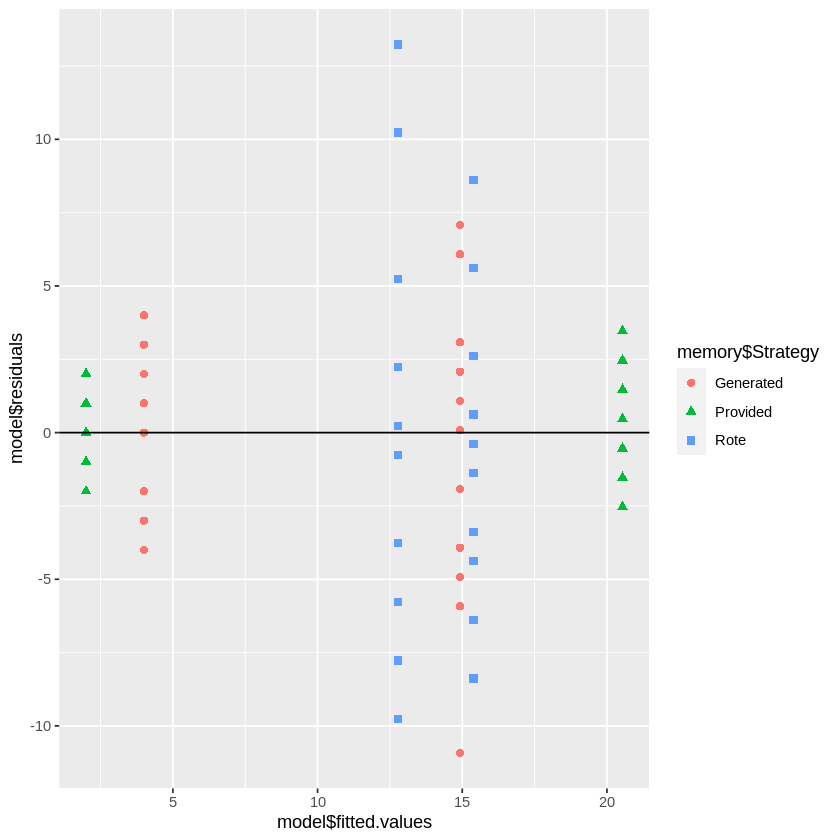

In [84]:
ggplot(mapping = aes(x = model$fitted.values, y = model$residuals)) +
  geom_point(size = 2,
            aes(colour = memory$Strategy, shape = memory$Strategy))+
              geom_hline(yintercept = 0, linetype = 1)

Question 29:

They do not look normally distributed to me.